In [9]:
##https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Sales data
## Q1. popular product
    >Overall
    >Country wise
    
## Q2. Popular deal size
## Q3. Does deal size and sales?
    > Overall
    > Country Wise
## Q4. Top consumer countries
    >According to number of orders
    >According to Sales


In [11]:
## Uploading and Reading File

df=pd.read_csv("C:/Users/gurvi/Downloads/sales_data_sample.csv",encoding_errors= 'replace')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [78]:
##Exploring data types and null values of each col.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [98]:
df['STATUS']

0        Shipped
1        Shipped
2        Shipped
3        Shipped
4        Shipped
          ...   
2818     Shipped
2819     Shipped
2820    Resolved
2821     Shipped
2822     On Hold
Name: STATUS, Length: 2823, dtype: object

In [15]:
## dropped unuseful data 
df1=df.drop(['STATUS','ADDRESSLINE2','CONTACTLASTNAME','CONTACTFIRSTNAME','PHONE','ADDRESSLINE2','POSTALCODE','CUSTOMERNAME',
             'ADDRESSLINE1'],axis=1)


In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   QtOD          2823 non-null   int64  
 1   Peach         2823 non-null   float64
 2   OD_line_numb  2823 non-null   int64  
 3   Sales         2823 non-null   float64
 4   ORDERDATE     2823 non-null   object 
 5   QTR_ID        2823 non-null   int64  
 6   Month         2823 non-null   int64  
 7   Year          2823 non-null   int64  
 8   Prod_line     2823 non-null   object 
 9   MSRP          2823 non-null   int64  
 10  Prod_code     2823 non-null   object 
 11  City          2823 non-null   object 
 12  State         1337 non-null   object 
 13  Country       2823 non-null   object 
 14  Territory     1749 non-null   object 
 15  Deal_size     2823 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory usage: 353.0+ KB


In [96]:
df1.PRODUCTLINE.unique()


array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [137]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ODnumb        2823 non-null   int64  
 1   QtOD          2823 non-null   int64  
 2   P_each        2823 non-null   float64
 3   OD_line_numb  2823 non-null   int64  
 4   Sales         2823 non-null   float64
 5   QTR_ID        2823 non-null   int64  
 6   Month         2823 non-null   int64  
 7   Year          2823 non-null   int64  
 8   Prod_line     2823 non-null   object 
 9   MSRP          2823 non-null   int64  
 10  Prod_code     2823 non-null   object 
 11  City          2823 non-null   object 
 12  State         1337 non-null   object 
 13  Country       2823 non-null   object 
 14  Territory     1749 non-null   object 
 15  Deal_size     2823 non-null   object 
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


In [19]:
df1.rename(columns={'QUANTITYORDERED': 'Qt_OD','PRICEEACH':'P_each' , 'ORDERLINENUMBER':'OD_line_numb','SALES':'Sales', 
                   'MONTH_ID':'Month','YEAR_ID':'Year' ,'PRODUCTLINE':'Prod_line','PRODUCTCODE':'Prod_code'
                   ,'CITY':'City' ,'STATE':'State','COUNTRY':'Country' ,'TERRITORY':'Territory','DEALSIZE':'Deal_size'}, inplace=True)
print(df1)

      ORDERNUMBER  Qt_OD  P_each  OD_line_numb    Sales        ORDERDATE  \
0           10107     30   95.70             2  2871.00   2/24/2003 0:00   
1           10121     34   81.35             5  2765.90    5/7/2003 0:00   
2           10134     41   94.74             2  3884.34    7/1/2003 0:00   
3           10145     45   83.26             6  3746.70   8/25/2003 0:00   
4           10159     49  100.00            14  5205.27  10/10/2003 0:00   
...           ...    ...     ...           ...      ...              ...   
2818        10350     20  100.00            15  2244.40   12/2/2004 0:00   
2819        10373     29  100.00             1  3978.51   1/31/2005 0:00   
2820        10386     43  100.00             4  5417.57    3/1/2005 0:00   
2821        10397     34   62.24             1  2116.16   3/28/2005 0:00   
2822        10414     47   65.52             9  3079.44    5/6/2005 0:00   

      QTR_ID  Month  Year    Prod_line  MSRP Prod_code           City State  \
0       

# Calculations  and visualization of data

# Q1. which products are most popular?

In [243]:
popular_prod=df1.groupby('Prod_line')['Sales'].count()
popular_prod

Prod_line
Classic Cars        967
Motorcycles         331
Planes              306
Ships               234
Trains               77
Trucks and Buses    301
Vintage Cars        607
Name: Sales, dtype: int64

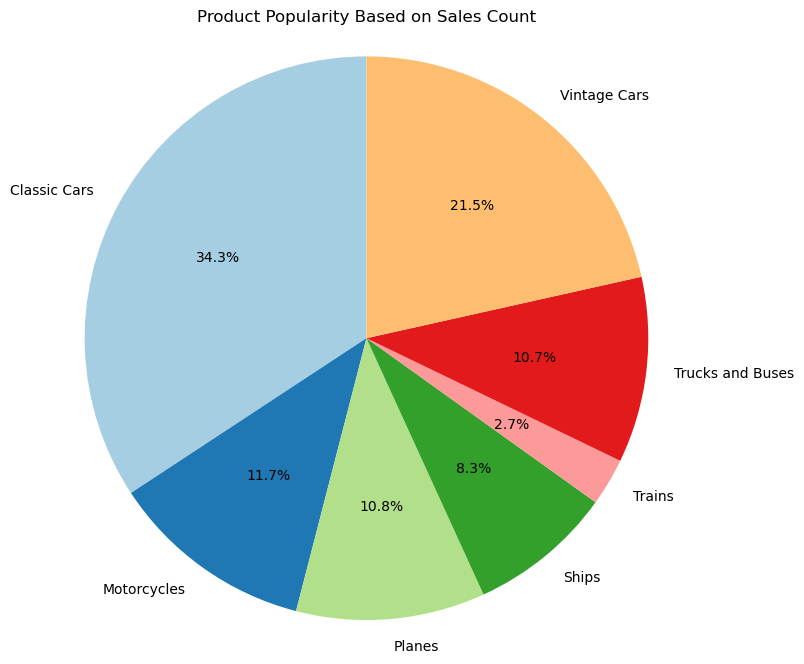

In [255]:
# Plotting a pie chart

plt.figure(figsize=(8, 8))
plt.pie(popular_prod, labels=popular_prod.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adding title
plt.title('Product Popularity Based on Sales Count')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

## Country wise Popular product

In [270]:
Prod_pop_country=df1.groupby(['Country','Prod_line'])['Sales'].count()
Prod_pop_country

Country    Prod_line       
Australia  Classic Cars         53
           Motorcycles          26
           Planes               25
           Ships                 2
           Trains                1
                              ... 
USA        Planes               95
           Ships                70
           Trains               25
           Trucks and Buses    112
           Vintage Cars        224
Name: Sales, Length: 116, dtype: int64

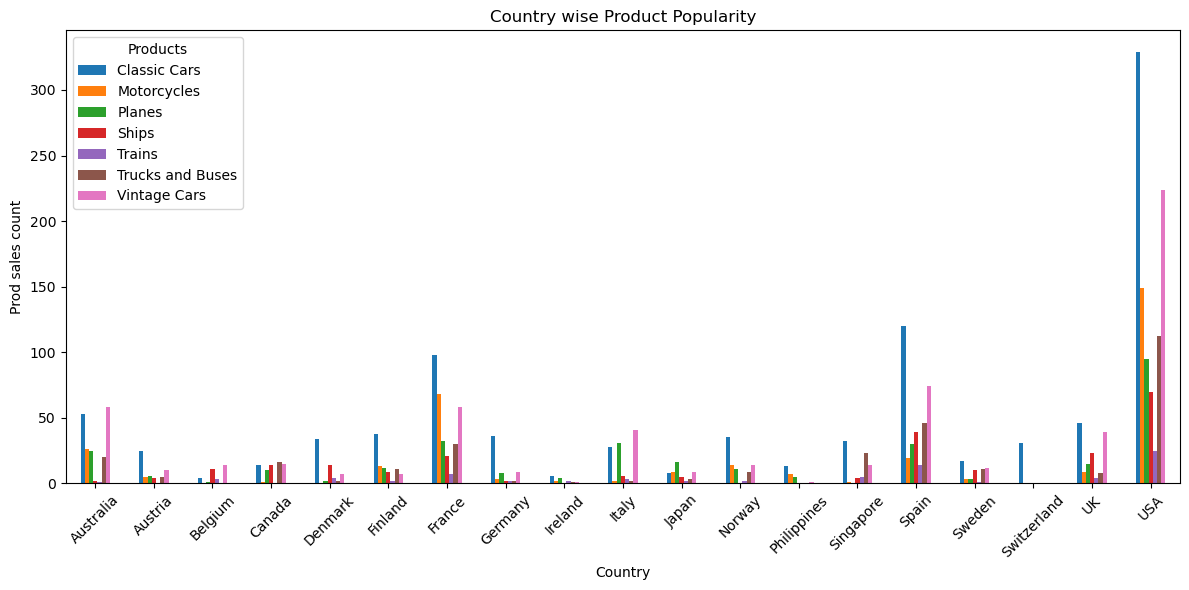

In [276]:
##Bar graph to compare country wise Product popularity

Prod_pop_country.unstack().plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Country wise Product Popularity')
plt.ylabel('Prod sales count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Products')
plt.tight_layout()

# Q2.Most Popular Deal Size

In [286]:
Pop_deal=df1['Deal_size'].value_counts()
Pop_deal

Deal_size
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

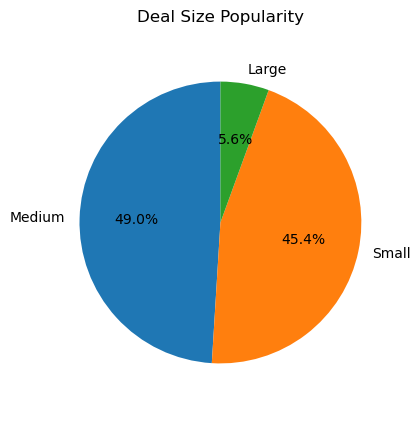

In [294]:
## Pie chart for popular deals
plt.figure(figsize=(4, 5))
plt.pie(Pop_deal, labels=Pop_deal.index, autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Deal Size Popularity')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

# Q3. Sales according to deal size
## Overall sales
### Country wise


In [322]:
Deal_sales=df1.groupby('Deal_size')['Sales'].sum()
Deal_sales

Deal_size
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: Sales, dtype: float64

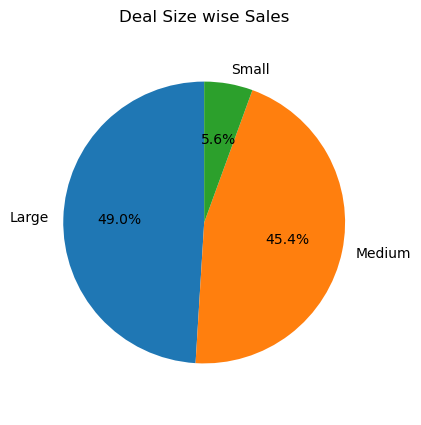

In [324]:
## Pie chart for Deal Size wise Sales 
plt.figure(figsize=(4, 5))
plt.pie(Pop_deal, labels=Deal_sales.index, autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Deal Size wise Sales')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

In [21]:
Deal_country_sales=df1.groupby(['Deal_size','Country'])['Sales'].sum()
Deal_country_sales

Deal_size  Country    
Large      Australia        60252.04
           Austria          32792.08
           Canada            9064.89
           Denmark          49886.67
           Finland          40012.32
           France          179004.87
           Germany          30496.06
           Ireland          15439.44
           Italy            57565.43
           Japan            25470.16
           Norway           41042.70
           Philippines       7483.98
           Singapore        35363.19
           Spain           141042.51
           Sweden           14345.30
           UK               35155.24
           USA             527702.38
Medium     Australia       381245.00
           Austria         125314.10
           Belgium          71531.37
           Canada          137430.48
           Denmark         140050.70
           Finland         201741.96
           France          643606.22
           Germany         133151.79
           Ireland          26822.87
           Ital

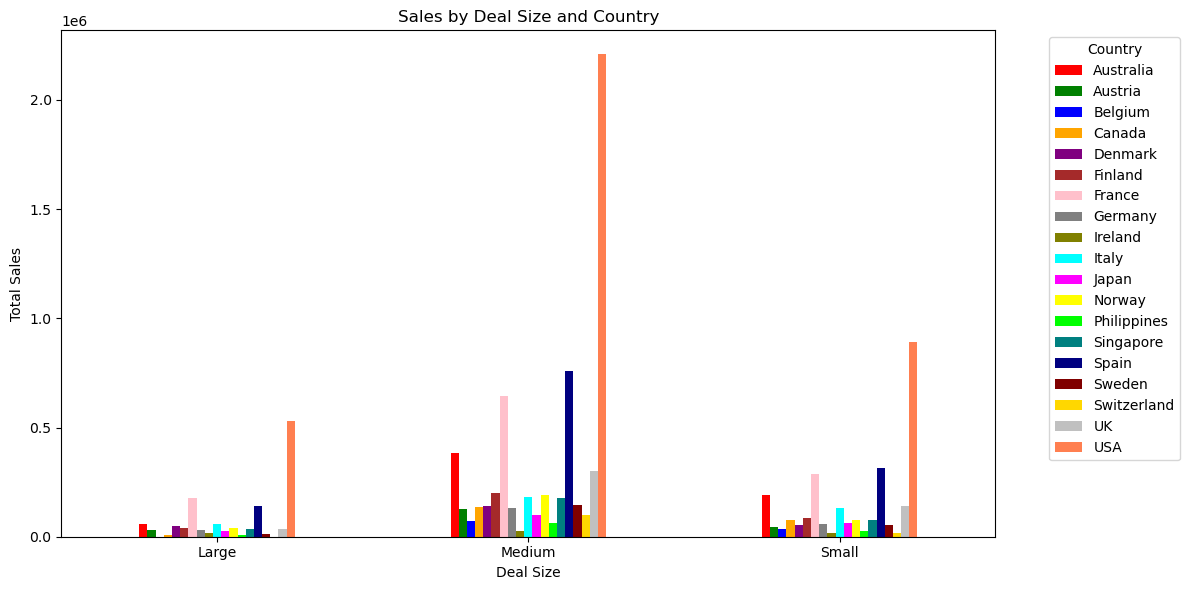

In [67]:
# Unstacking for better visualization in bar chart

Deal_country_sales.unstack().plot(kind='bar', figsize=(12, 6), color= ('red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'navy', 'maroon', 'gold', 'silver', 'coral', 'indigo'))

# Adding labels and title
plt.title('Sales by Deal Size and Country')
plt.ylabel('Total Sales')
plt.xlabel('Deal Size')
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Q4. Top consumer countries

## According to number of orders, top consumer

In [327]:
Top_cons_OD=df1.groupby('Country')['QtOD'].count()
Top_cons_OD

Country
Australia       185
Austria          55
Belgium          33
Canada           70
Denmark          63
Finland          92
France          314
Germany          62
Ireland          16
Italy           113
Japan            52
Norway           85
Philippines      26
Singapore        79
Spain           342
Sweden           57
Switzerland      31
UK              144
USA            1004
Name: QtOD, dtype: int64

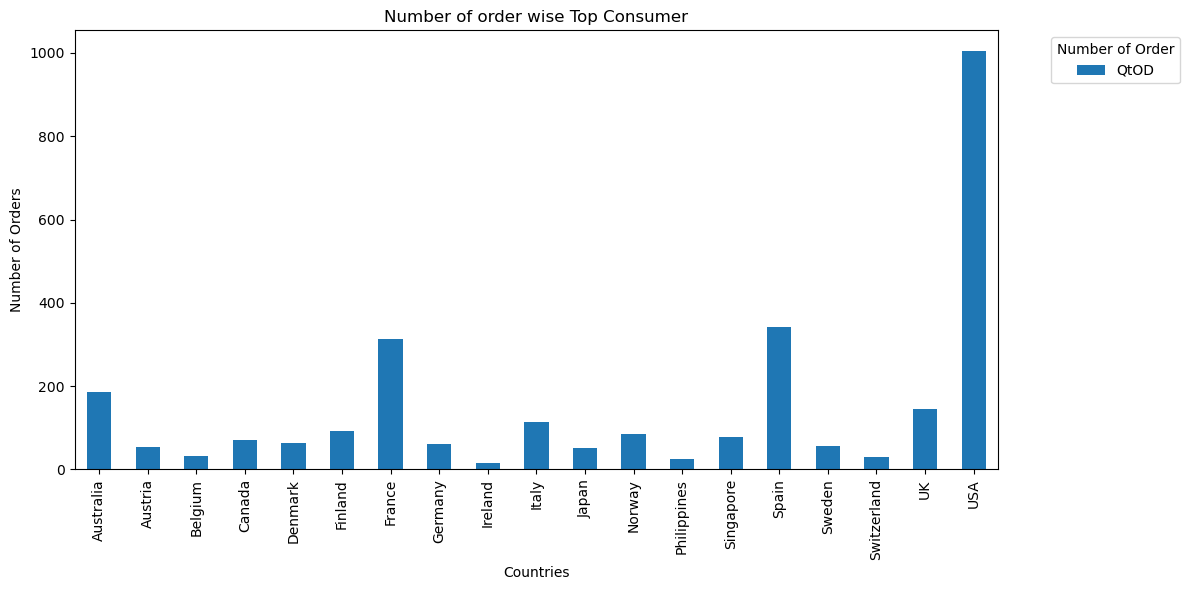

In [362]:
# bar chart
Top_cons_OD.plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Number of order wise Top Consumer')
plt.ylabel('Number of Orders')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.legend(title='Number of Order', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Top consumer, According to Sales

In [329]:
Top_cons_sales=df1.groupby('Country')['Sales'].sum()
Top_cons_sales

Country
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: Sales, dtype: float64

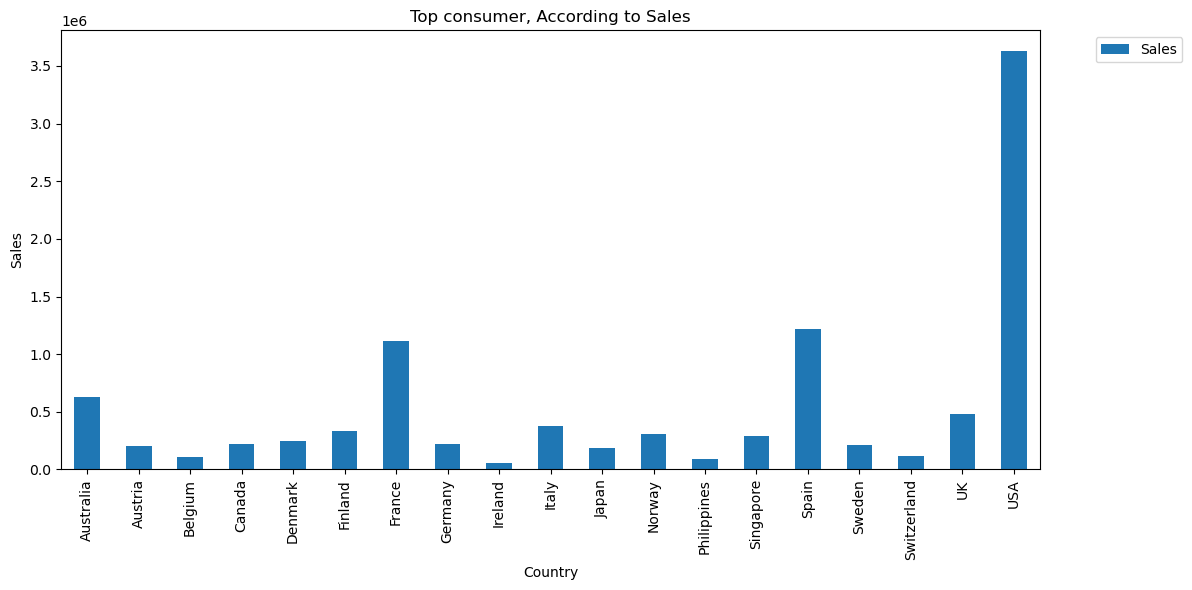

In [359]:
# bar chart
Top_cons_sales.plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Top consumer, According to Sales')
plt.ylabel('Sales')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# THANK YOU